In [32]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from semaxis import *
import numpy as np

# Path to the pretrained Word2Vec model file
#pretrained_model_path = './datasets/GoogleNews-vectors-negative300.bin'
#word2vec_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

pretrained_model_path = 'models/full_young.wordvectors'


# Load the Word2Vec model
word2vec_model = KeyedVectors.load(pretrained_model_path, mmap='r')
male_model = KeyedVectors.load('models/male.wordvectors', mmap='r')
female_model = KeyedVectors.load('models/female.wordvectors', mmap='r')

In [21]:
word2vec_model.key_to_index

{'the': 0,
 'i': 1,
 'and': 2,
 'to': 3,
 'a': 4,
 'of': 5,
 'it': 6,
 'this': 7,
 'is': 8,
 'book': 9,
 'that': 10,
 'was': 11,
 'in': 12,
 'but': 13,
 'for': 14,
 'her': 15,
 'with': 16,
 'she': 17,
 'so': 18,
 'me': 19,
 'read': 20,
 'you': 21,
 'not': 22,
 'as': 23,
 'my': 24,
 'like': 25,
 'be': 26,
 'have': 27,
 'on': 28,
 'just': 29,
 'about': 30,
 'love': 31,
 'really': 32,
 'one': 33,
 'all': 34,
 'story': 35,
 'are': 36,
 'its': 37,
 'at': 38,
 'what': 39,
 'more': 40,
 'because': 41,
 'there': 42,
 'characters': 43,
 'they': 44,
 'from': 45,
 'how': 46,
 'out': 47,
 'if': 48,
 'an': 49,
 'when': 50,
 'im': 51,
 'up': 52,
 'or': 53,
 'would': 54,
 'had': 55,
 'will': 56,
 'much': 57,
 'who': 58,
 'has': 59,
 'he': 60,
 'reading': 61,
 'good': 62,
 'very': 63,
 'loved': 64,
 'can': 65,
 'were': 66,
 'by': 67,
 'books': 68,
 'didnt': 69,
 'first': 70,
 'even': 71,
 'no': 72,
 'think': 73,
 'know': 74,
 'dont': 75,
 'some': 76,
 'get': 77,
 'time': 78,
 'into': 79,
 'did': 80,
 

In [22]:
# Example usage
# word_embedding = word2vec_model['cake']
# print(f'Embedding for "cake": {word_embedding[:5]} ...')
# Find similar words
word_check = "protagonist"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

word_check = "love"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

Similar words to protagonist: [('heroine', 0.8979477882385254), ('mc', 0.8782995343208313), ('character', 0.8130982518196106), ('protaganist', 0.8037757873535156), ('protag', 0.7916674613952637), ('narrator', 0.7899376749992371), ('character-', 0.7799121141433716), ('female', 0.776492714881897)]
Similar words to love: [('in-love', 0.7405802011489868), ('looooove', 0.7396659851074219), ('head-over-heels', 0.7366576790809631), ('inlove', 0.7209441661834717), ('lovebut', 0.7205837368965149), ('lovea', 0.7179619669914246), ('loooove', 0.7135793566703796), ('triange', 0.7116845846176147)]


In [36]:
word_check = "protagonist"
similar_words = male_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')
word_check = "protagonist"
similar_words = female_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

Similar words to protagonist: [('mc', 0.8121955990791321), ('narrator', 0.7896242737770081), ('main', 0.7759932279586792), ('character', 0.7607544660568237), ('character/narrator', 0.760174036026001), ('everyman', 0.7148529291152954), ('hero', 0.704007625579834), ('character-', 0.6981883645057678)]
Similar words to protagonist: [('heroine', 0.8979477882385254), ('mc', 0.8782995343208313), ('character', 0.8130982518196106), ('protaganist', 0.8037757873535156), ('protag', 0.7916674613952637), ('narrator', 0.7899376749992371), ('character-', 0.7799121141433716), ('female', 0.776492714881897)]


In [23]:
def check_axis(word_pair):
    word_check = word_pair[0]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')
    word_check = word_pair[1]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')

In [24]:
axis_words = ["evil","good"]
axis = transform_antonym_to_axis(word2vec_model,axis_words,10)
print(cosine_similarity(word2vec_model["evil"],axis))


-0.505638062953949


In [25]:
def plot_line_graphs(categories, label='plot label'):
    """
    Plot line graphs for multiple categories using matplotlib with tilted x-axis labels and different colors.

    Parameters:
    - categories (list of tuples): Each tuple contains a category name, a list of value names, and a list of values.

    Returns:
    - None
    """
    # Define a list of colors for each category
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plotting line graphs for each category
    for i, (category, names, values) in enumerate(categories):
        plt.plot(names, values, marker='o', linestyle='-', label=category, color=colors[i])

    # Adding labels and title
    plt.xlabel('Axis pairs')
    plt.ylabel('Average projection values')
    plt.title(label)
    
    # Tilt x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

# # Example usage:
# categories_data = [
#     ('Category 1', ['Label A', 'Label B', 'Label C', 'Label D', 'Label E'], [10, 20, 15, 25, 30]),
#     ('Category 2', ['Label F', 'Label G', 'Label H', 'Label I', 'Label J'], [5, 15, 10, 20, 25]),
# ]

# plot_line_graphs(categories_data)


In [26]:
def evaluate_axis(embedding, axis_pair, evaluation_words,  k=5):
    results = []
    axis = transform_antonym_to_axis(embedding, axis_pair, k)
    for word in evaluation_words:
        results.append(cosine_similarity(embedding[word],axis))
    return np.mean(results)
def evaluate_axes(embedding, axis_pairs, evaluation_words, label="", k=5):
    results = []
    names = []
    values = []
    for axis_pair in axis_pairs:
        values.append(evaluate_axis(embedding, axis_pair, evaluation_words, k=k))
        names.append(axis_pair[0]+"-"+axis_pair[1])
    return (label, names, values)

In [27]:
axis_pairs = np.char.lower(np.loadtxt("axis.csv", dtype=str, delimiter=","))
axis_pairs_con = np.char.lower(np.loadtxt("axis_connatation.csv", dtype=str, delimiter=","))

In [41]:
female_terms = ['she', 'her', 'hers', 'woman', 'girl','heroine']
male_terms = ['he', 'him', 'his', 'man', 'guy', 'hero']
protag_terms = ['protagonist', 'mc','character-','character','main']
random_terms = ['cake', 'god', 'fish', 'bread', 'calendar', 'bicycle', 'window', 'coffee', 'book']

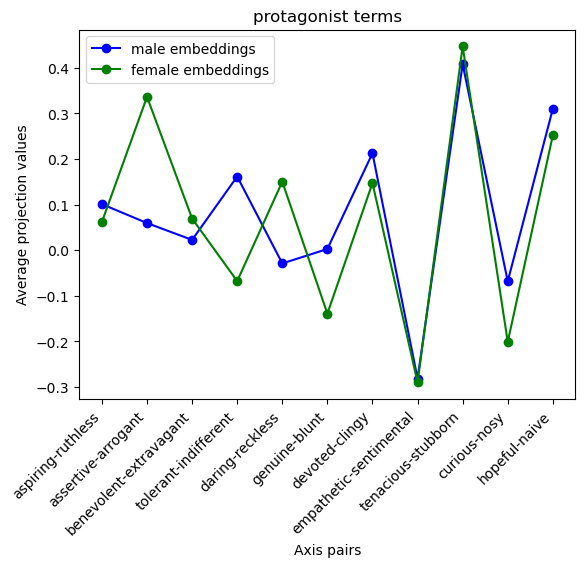

In [39]:
results = []

results.append(evaluate_axes(female_model, axis_pairs_con, protag_terms ,label="male embeddings",k=5))

results.append(evaluate_axes(male_model, axis_pairs_con, protag_terms,label="female embeddings",k=5))

plot_line_graphs(results, label="protagonist terms")

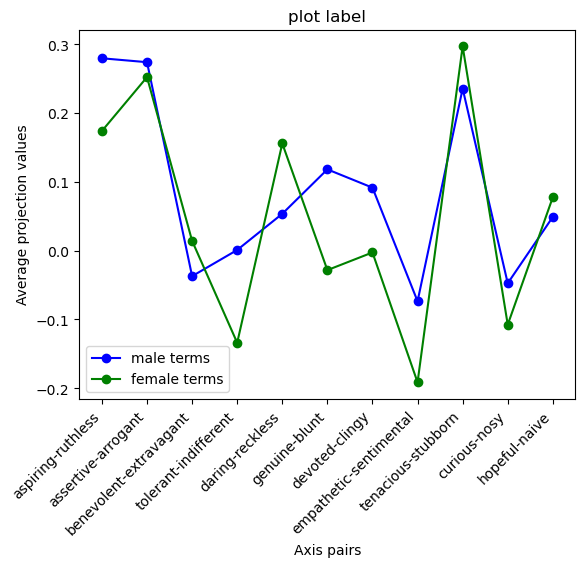

In [40]:
results = []

results.append(evaluate_axes(female_model, axis_pairs_con, male_terms ,label="male terms",k=5))

results.append(evaluate_axes(male_model, axis_pairs_con, female_terms,label="female terms",k=5))

plot_line_graphs(results)


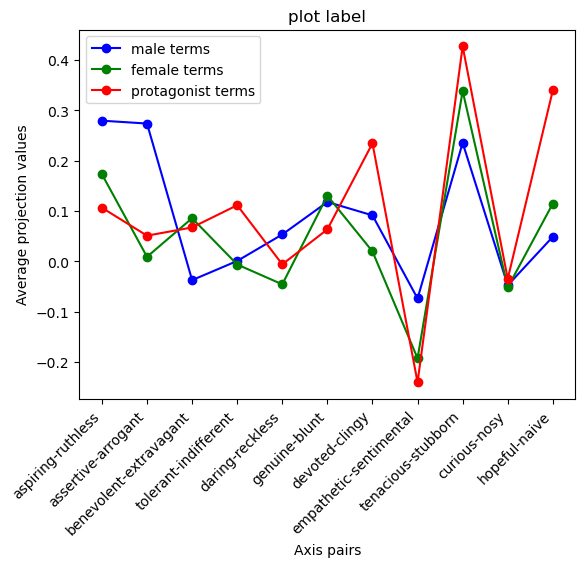

In [29]:
results = []


results.append(evaluate_axes(word2vec_model, axis_pairs_con, male_terms[:7] ,label="male terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_con, female_terms[:7],label="female terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_con, protag_terms[:7],label="protagonist terms",k=5))

#results.append(evaluate_axes(word2vec_model, axis_pairs_con, random_terms[:7],label="random terms",k=5))


plot_line_graphs(results)


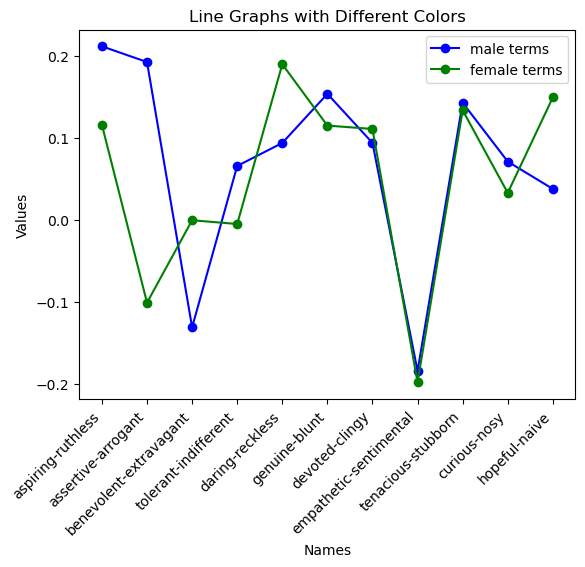

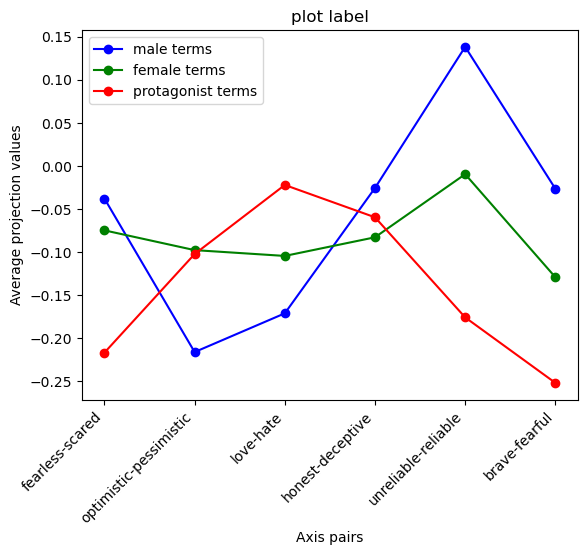

In [30]:
results = []


results.append(evaluate_axes(word2vec_model, axis_pairs, male_terms[:7] ,label="male terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs, female_terms[:7],label="female terms",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs, protag_terms[:7],label="protagonist terms",k=5))

plot_line_graphs(results)

In [31]:
for pair in axis_pairs_con:
    print("pair:")
    check_axis(pair)

pair:
Similar words to aspiring: [('majored', 0.7169187664985657), ('educator', 0.6892117857933044), ('undergraduate', 0.6773234009742737), ('cited', 0.6749736070632935), ('prolific', 0.6655829548835754), ('ardent', 0.6655341982841492), ('centric', 0.6577810645103455), ('veteran', 0.6557515263557434)]
Similar words to ruthless: [('calculating', 0.764135479927063), ('vicious', 0.7574793100357056), ('killer', 0.7490726113319397), ('savage', 0.7433076500892639), ('cold-blooded', 0.7398025393486023), ('merciless', 0.7376599311828613), ('devious', 0.7274249196052551), ('power-hungry', 0.7263237833976746)]
pair:
Similar words to assertive: [('hard-headed', 0.8379604816436768), ('independant', 0.8288328051567078), ('self-reliant', 0.8174993991851807), ('unfailingly', 0.8172973394393921), ('self-confident', 0.8146029710769653), ('confidant', 0.8146023750305176), ('demure', 0.8118206262588501), ('impetuous', 0.8112744688987732)]
Similar words to arrogant: [('cocky', 0.8755937218666077), ('rude'